# Lib

In [1]:
import os 
import re 
import requests 
from bs4 import BeautifulSoup  
import pandas as pd 
from pathlib import Path
import nltk 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from fake_useragent import UserAgent
# nltk.download('popular')
# nltk.download('wordnet')
# https://www.nltk.org/howto/wordnet.html
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import random
import time

In [ ]:
rundll32 sysdm.cpl,EditEnvironmentVariables

In [ ]:
https://stackoverflow.com/questions/41535881/how-do-i-upgrade-to-python-3-6-with-conda

In [ ]:
C:\ProgramData\Anaconda3
C:\ProgramData\Anaconda3\Scripts
C:\ProgramData\Anaconda3\Library\mingw-w64\bin
C:\ProgramData\Anaconda3\Library\bin
C:\ProgramData\Anaconda3\Library\usr\bin
C:\ProgramData\Anaconda3\Lib\site-packages

In [ ]:
conda env remove -n envname

In [ ]:
#no need to a specific env
jupyter kernelspec list
jupyter kernelspec uninstall unwanted-kernel

python -m ipykernel install --user --name myenv --display-name "Python (myenv)"

In [ ]:
import: if same folder:
    from user import User
from dir import Dir

In [ ]:
path issue: 
from pathlib import Path
import sys
path = str(Path(Path(__file__).parent.absolute()).parent.absolute())
sys.path.insert(0, path)


# NLP: Wordcloud, sentiments
* https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

In [12]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
ua=UserAgent()
hdr = {'User-Agent': ua.random,
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
      'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
      'Accept-Encoding': 'none',
      'Accept-Language': 'en-US,en;q=0.8',
      'Connection': 'keep-alive'}
url = "http://www.amazon.com/dp/" + 'B004CNH98C'
response = requests.get(url, headers=hdr)

In [18]:
all_urls = []

school = "https://en.wikipedia.org/wiki/Carnegie_Mellon_University"
school = "https://en.wikipedia.org/wiki/University_of_California,_Berkeley"

respose = requests.get(school, headers = hdr)

soup = BeautifulSoup(respose.content)
for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
    all_urls.append(link.get('href'))

## menus

In [19]:
for section in soup.findAll("span", attrs ={"class": "mw-headline"}):
    print(section.get_text())
 
          

History
Founding
20th century
21st century
Organization and administration
Name
Governance
Funding
Academics
Undergraduate programs
Graduate and professional programs
Faculty and research
Library system
Rankings
Admissions and enrollment
Discoveries and innovation
Natural sciences
Computer and applied sciences
Companies and entrepreneurship
Campus
Architecture
Natural features
Student life and traditions
Student housing
University housing
Cooperative housing
Fraternities and sororities
Student-run organizations
Associated Students of the University of California (ASUC)
Media and publications
Student groups
Engineering Student Teams
Athletics
Notable alumni, faculty, and staff
Faculty and staff
Alumni
Controversies
See also
Notes
References
Further reading
External links


In [26]:
text = soup.get_text()

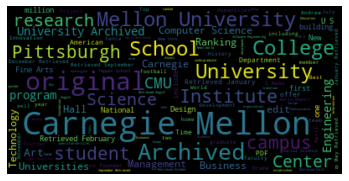

In [27]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [30]:
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5]) 

[('Carnegie Mellon', 229), ('original', 131), ('Archived', 105), ('College', 82), ('Mellon University', 82)]
[('Carnegie Mellon', 1.0), ('original', 0.5720524017467249), ('Archived', 0.4585152838427948), ('College', 0.35807860262008734), ('Mellon University', 0.35807860262008734)]


In [ ]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['biden'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['biden'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment
* https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

In [33]:
from textblob import TextBlob

testimonial = TextBlob(text)
print(testimonial.sentiment)

Sentiment(polarity=0.1318348279228097, subjectivity=0.3776367151554783)


In [ ]:
!pip install vaderSentiment

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!" 
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

The food was great!---------------------------------------------- {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [7]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('The food was great!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

ModuleNotFoundError: No module named 'flair'

In [ ]:
!pip install flair

# wiki Aermerican universities

In [85]:
url = "https://en.wikipedia.org/wiki/Lists_of_American_universities_and_colleges"

### Lists

In [98]:
all_urls = []
## url = "http://www.amazon.com/dp/" + 'B004CNH98C'
local_url = r"C:\SP\Teaching\DSCamp\University_List_EntryPage.html"
with open(local_url, "r", encoding = "utf8") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

for link in soup.findAll('a'):
    sub_url = link.get("href") #link["href"]
    if sub_url:
        all_urls.append(sub_url)

In [ ]:
def 

### From Web

In [ ]:
state_ulr = "https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_Connecticut"

In [ ]:
soup = None
all_urls = []
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
ua=UserAgent()
hdr = {'User-Agent': ua.random,
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
      'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
      'Accept-Encoding': 'none',
      'Accept-Language': 'en-US,en;q=0.8',
      'Connection': 'keep-alive'}

response = requests.get(state_ulr, headers=hdr)
soup = BeautifulSoup(respose.content) 

all_urls = [] 
#for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
#for link in soup.findAll('a', attrs={'href': re.compile(".+")}):
#for link in soup.findAll('a', attrs={'href': ""}):
for link in soup.findAll('a'):
    
    print(link)
    continue
    
    sub_url = link.get("href") #link["href"]
    if sub_url:
        all_urls.append(sub_url)

,url,title,state
0,/wiki/College,colleges,Connecticut
1,/wiki/University,universities,Connecticut
2,/wiki/U.S._state,U.S. state,Connecticut
3,/wiki/Connecticut,Connecticut,Connecticut
4,/wiki/Associates_degree,associates,Connecticut
...,...,...,...
386,/wiki/Wikipedia:About,About Wikipedia,Connecticut
387,/wiki/Wikipedia:General_disclaimer,Disclaimers,Connecticut
388,//en.wikipedia.org/wiki/Wikipedia:Contact_us,Contact Wikipedia,Connecticut
389,https://www.mediawiki.org/wiki/Special:MyLangu...,Developers,Connecticut


In [162]:
def parse_us_colleges(url = "https://en.wikipedia.org/wiki/Lists_of_American_universities_and_colleges"): 
    state_ulr = url  
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    ua=UserAgent()
    hdr = {'User-Agent': ua.random,
          'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
          'Accept-Encoding': 'none',
          'Accept-Language': 'en-US,en;q=0.8',
          'Connection': 'keep-alive'}
    response = requests.get(state_ulr, headers=hdr)

    results = []
    soup = BeautifulSoup(response.content, 'html.parser')
    allLinks = soup.find_all("a")
    for link in allLinks:   
        if not link:
            continue 
        if not link.has_attr("href"): 
            continue
        if link['href'].find("/wiki/") == -1: 
            continue
        results.append((link["href"], link.get_text()))
    df_state = pd.DataFrame(results, columns = ["url", "title"])
    df_state["coutry"] = "USA"
    
    return df_state

In [163]:
def parse_one_state(state_url, the_state = None):  
     
    #state_ulr = "https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_Connecticut"
      
    if not the_state:
        the_state = state_ulr.split("_")[-1] 
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    ua=UserAgent()
    hdr = {'User-Agent': ua.random,
          'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
          'Accept-Encoding': 'none',
          'Accept-Language': 'en-US,en;q=0.8',
          'Connection': 'keep-alive'}
    response = requests.get(state_ulr, headers=hdr)
    
    results = []
    soup = BeautifulSoup(response.content, 'html.parser')
    allLinks = soup.find_all("a")
    for link in allLinks:   
        if not link:
            continue 
        if not link.has_attr("href"): 
            continue
        if link['href'].find("/wiki/") == -1: 
            continue
        results.append((link["href"], link.get_text()))
    df_state = pd.DataFrame(results, columns = ["url", "title"])
    df_state["state"] = the_state
    
    return df_state



In [204]:
def generatte_wiki_list():
    df_country = parse_us_colleges()
    #df_country = df_country.style.set_properties(subset=['url'], **{'width-min': '150'})
    df_country
    df_states = [] 
    for one_row in df_country.itertuples(): 
        ii, url, title = one_row[0], one_row[1], one_row[2]
        if not re.search("List_of", url):
            continue
        url = "https://en.wikipedia.org" + url 
        print(url)
        df_state_ = parse_one_state(url, the_state = title)
        df_state_["scrape_url"] = url
        df_states.append(df_state_)
        time.sleep(15)
        if ii > 3:
            break
    total = pd.concat(df_states, axis = 0)
    total.to_csv("US_University_WikiPages_List.csv", index = False)
    return total

In [205]:
dds = generatte_wiki_list()

https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions


In [ ]:

tt.groupby("title")["url"].nunique().reset_index()

In [194]:
df_list = generatte_wiki_list()

In [190]:
for one_row in df_country.itertuples():
    url, title = one_row[1], one_row[2]
    print(url)

/wiki/Category:Education_in_the_United_States
/wiki/Education_in_the_United_States
/wiki/Category:Education_in_the_United_States_by_state
/wiki/Category:Education_in_insular_areas_of_the_United_States
/wiki/Category:Education_in_the_United_States_by_subject
/wiki/History_of_education_in_the_United_States
/wiki/Educational_accreditation
/wiki/Pre-tertiary-education_accreditation
/wiki/Higher_education_accreditation_in_the_United_States
/wiki/Category:Education_finance_in_the_United_States
/wiki/Category:United_States_education_law
/wiki/Literacy_in_the_United_States
/wiki/Issues_in_higher_education_in_the_United_States
/wiki/Higher_education_bubble_in_the_United_States
/wiki/Cost_and_financing_issues_facing_higher_education_in_the_United_States
/wiki/Credentialism_and_educational_inflation
/wiki/Elite_overproduction
/wiki/Graduate_unemployment#United_States
/wiki/Education_reform##Contemporary_issues_(United_States)
/wiki/Charter_schools_in_the_United_States
/wiki/Educational_inequality

In [159]:
df_state[df_state["url"].str.contains("Connec")].iloc[0, :].T

url       /wiki/List_of_colleges_and_universities_in_Con...
title                                           Connecticut
coutry                                                  USA
Name: 42, dtype: object

In [88]:
all_urls = [] 
#for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
#for link in soup.findAll('a', attrs={'href': re.compile(".+")}):
#for link in soup.findAll('a', attrs={'href': ""}):
for link in soup.findAll('a'):
    sub_url = link.get("href") #link["href"]
    if sub_url:
        all_urls.append(sub_url)


In [95]:
for aa in all_urls: 
    if "elaw" in aa:
        print(aa)

/wiki/University_of_Delaware


3662

# word list -- part 2
* let's make it more relavant
* let's make a learning plan 

In [327]:
# url = "https://satvocabulary.us/INDEX.ASP?CATEGORY=6000LIST"
output_file_foler = os.getcwd() 
file_name = "Session_01_SAT_Vocab.csv" 
output_file = Path(output_file_foler, file_name)

df_words = pd.read_csv(output_file) 

df_words.dropna()

,Seq,WORD,DEFINITION,GROUPING
0,1,abash,to make ashamed,verb
1,2,abate,to put an end to,verb
2,3,abbess,a female superior or governess of a nunnery,noun
3,4,abbey,a monastery or society of people,noun
4,5,abbot,the superior or head of an abbey or monastery,noun
...,...,...,...,...
5995,5996,zeitgeist,a trend of thought characteristic of a particu...,noun
5996,5997,zenith,a highest point or state,noun
5997,5998,zephyr,"a gentle, mild breeze",noun
5998,5999,zodiac,an astrological system,noun


In [272]:
for row in df_words.itertuples():
    print(row[2], row, row[4])
    break

abash Pandas(Index=0, Seq=1, WORD='abash', DEFINITION='to make ashamed', GROUPING='verb') verb


In [320]:
def get_wn_tag(tag):
    """
        input: tag is the Grouping in the sat word list
        output: the tagging that required by NLTK 
    """ 
    tag = tag.lower()
    
    if tag in ['adjective', 'adj']:
        return wn.ADJ
    elif tag in ['adverb', "adv"]:
        return wn.ADV
    elif tag in ['noun']:
        return wn.NOUN
    elif tag in ['verb']:
        return wn.VERB
    #elif tag in ['preposition']:
    #    return wn.PRP
    else:
        return ""

# Wordlist

In [317]:
def synonym_antonyms_parser(token = "notebook",  tag = "noun", *args, **kwargs  ):  
    """
        input: token，one of the word in SAT 6000
        output: synonym, antonym and sample sentences, if with_example_sentence set to True 
        *args, **kwargs: more to elaborate
    """
    # get the the tag used in nltk
    wn_tag = get_wn_tag(tag) 
    
    # result list. in format of [token, seq, definition, sample sentences, synonyms, antonyms]
    result = []
    
    synsets = wn.synsets(token,wn_tag)
    
    if not synsets: 
        return [[token, 1, "", "", "", ""]] # just return the token. other fields to be blank
    
    for i, synset in enumerate(synsets): 
        
        one_row = [token, i + 1] 
        
        one_row.append(synset.definition()) 
        
        #sentences. make first Character in capital
        examples = synset.examples()
        examples = [example[0].upper()+example[1:] for example in examples] 
        one_row.append('. '.join(examples))
         
        # handle synonyms and antonyms
        synonyms_words, antonyms_words = [], []
        
        lemmas = synset.lemmas() 
        for word in lemmas: 
            synonyms_words.append(word.name()) 
            
            antonyms = word.antonyms() 
           
            for antonym in antonyms: 
                antonyms_words.append(antonym.name())
                
        one_row.append('. '.join(synonyms_words))
        one_row.append('. '.join(antonyms_words))
       
        result.append(one_row)
        
    return result

In [359]:
def enrich_sat_list(sat_word_list_file, output_file = None, *args, **kwargs):
    """
        input: sat_word_list_file, output_file, *args, **kwargs
            sat_word_list_file: generated from previous lesson
            outputfile: if None, then save to current wd
        output: 
            None if success. 
            exception: print and return error message
    """
    if not os.path.exists(sat_word_list_file):
        return "sat word file doesn't exist"
    
    df_word = pd.read_csv(sat_word_list_file)
    
    # handle null
    df_word.fillna("noun", inplace = True)
    
    #now iterate all words: 
    enriched_list = []
    for row in df_words.itertuples():
        token, defintion, grouping = row[2], row[3], row[4] 
        
        
        enriched = synonym_antonyms_parser(token = token, tag = grouping, *args, **kwargs  )
        enriched_list.extend(enriched)
    
    df_enriched = pd.DataFrame(enriched_list, columns = ["token","seq","additional_definition","sample sentences","synonyms","antonyms"])
     
    df_word = df_word.merge(df_enriched, left_on = "WORD", right_on = "token", how = "left")
    df_word.drop("token", axis = 1, inplace = True)
    
    if not output_file:
        output_file = Path(os.getcwd(), "EnrichedSatWordList.csv")
    
    df_word.to_csv(output_file, index = False) 
    
    return df_word, output_file
                               
    
    

## one line way:

In [59]:
print(sum([1/np.power(2.,i) for i in range(1 + int(np.log2(128)))]))
print(sum([1/np.power(2.,i) for i in range(1 + int(np.log2(4294967296)))]))

print(sum([1/np.float_power(2.,i) for i in range(1 + int(np.log2(4294967296)))]))


1.9921875
1.9999999997671694
1.9999999997671694


## method way 

In [21]:
def sum_up(x):
    """
        x is a list [1, 1/2....1/128]
    """
    # one line: 
    #return sum(x)

    #or: 
    result = 0 
    for item in x: 
        result += x
    
    return result  

In [55]:
def sum_up(n, base = 2):
    """
        n is the denominator of last number
        lots of corner cases are not considered
        np: max is power(2, 1023)
    """
    start,   result = 1, 1 
    while start <= n:   
        result += 1/start
        start *= base    
    return result  

## learning:  
* python list
* number, over float 
* function. 

# Pyvis
* https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01

In [ ]:
https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01

In [ ]:
!pip install pyvis

In [18]:
from pyvis.network import Network

net = Network(notebook = True)

net.add_node(1, label='Alex')
net.add_node(2, label='Cathy')

net.add_nodes([3, 4, 5, 6], 
              label=['Michael', 'Ben', 'Oliver', 'Olivia'],
              color=['#3da831', '#9a31a8', '#3155a8', '#eb4034'])
net.show('list_of_nodes_with_color.html')

net.add_edge(1, 5, value=2)
net.add_edges([(2, 5, 5), (3, 4, 2), (1, 6), (2, 6), (3, 5)])
net.repulsion(node_distance=100, spring_length=100)

net.repulsion(node_distance=50, spring_length=200)
net.show('nodes.html') 

# networkx
* https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
* https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html